# Credit Risk Explanatory Data Analysis
  * This notebook provides a comprehensive Exploratory Data Analysis (EDA) of the credit risk dataset.
  * It includes data loading, preprocessing, missing value analysis, and feature exploration to uncover patterns and insights relevant to credit risk and fraud detection.


## Introduction
* This notebook walks through the data preprocessing steps for the credit risk dataset
* It covers loading the raw data, cleaning and normalizing text columns, and preparing the data for further analysis or modeling.
* The code is modular and includes error handling to ensure robustness.

## The workflow includes:
 - Loading the raw data and initializing the EDA class.
 - Preprocessing and cleaning the data, including normalization of text columns.
 - Analyzing missing values to understand data quality.
 - Exploring the target variable (`FraudResult`) with visualizations
 - Investigating numerical and categorical features for patterns and distributions.
 - Examining time-based patterns in the transaction data.
 - Providing summary statistics and visual insights to support further modeling or business understanding.
 - The code is modular, robust, and leverages reusable EDA utilities from the `src/eda.py` module.


# instance creation
-The next cell initializes the CreditRiskEDA class by creating an instance called `eda`.
This object will be used throughout the notebook to perform data loading, preprocessing and various exploratory data analysis (EDA) tasks on the credit risk dataset.


In [4]:
eda = CreditRiskEDA(data_path='../data/raw/data.csv', target_col='FraudResult')

## Data Loading
* The next cell loads the credit risk dataset using the `load_data` method of the `CreditRiskEDA` instance (`eda`).
* It applies preprocessing steps (such as cleaning and normalization) by setting `use_preprocessing=True`
* The resulting DataFrame (`df`) will be used for all subsequent analysis and exploration in this notebook.


In [5]:
df = eda.load_data(use_preprocessing=True)

=== LOADING AND EXPLORING DATA ===
Loading data from: ../data/raw/data.csv
⚠️  data_processing module not found, loading raw data
Dataset shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Total records: 95,662
Total features: 16
Memory usage:

## Missing Values Analysis
* The next cell analyzes missing values in the dataset using the `analyze_missing_values` method of the `CreditRiskEDA` instance (`eda`).
* This operation generates a summary DataFrame (`missing_df`) that shows the count and percentage of missing values for each column.
* Understanding missing data is crucial for assessing data quality and determining appropriate data cleaning or imputation strategies.


In [6]:
missing_df = eda.analyze_missing_values()


Missing values:
✅ No missing values found


## Target Variable Analysis
* The next cell examines the target variable (`FraudResult`) using the `analyze_target_variable` method of the `CreditRiskEDA` instance (`eda`).
* This analysis provides summary statistics and visualizations (such as class distribution plots) to help understand the balance and characteristics of the target variable.
* Understanding the target variable is essential for guiding further analysis and modeling decisions.



=== TARGET VARIABLE ANALYSIS ===
Value counts: {0: 95469, 1: 193}
Percentages: {0: 99.79824799816019, 1: 0.20175200183981098}
Class imbalance ratio: 494.66:1


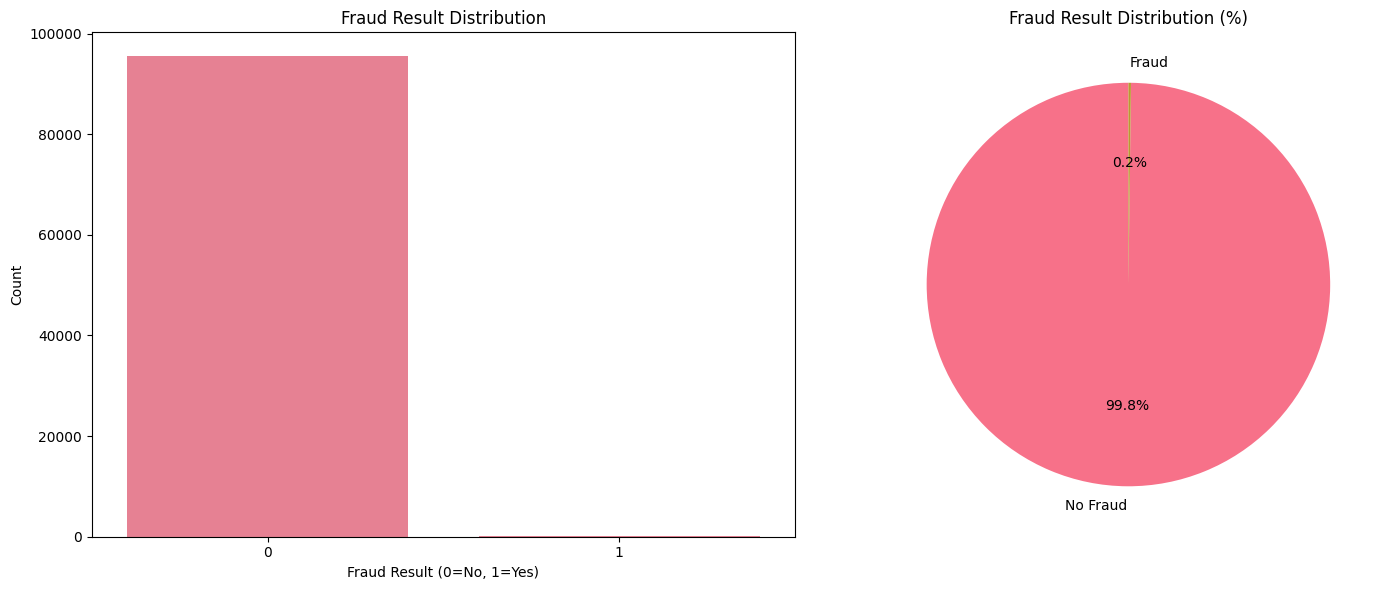

In [7]:
target_stats = eda.analyze_target_variable(show_plots=True)

## Numerical Features Analysis
* The next cell analyzes the numerical features in the dataset using the `analyze_numerical_features` method of the `CreditRiskEDA` instance (`eda`).
* This method computes summary statistics (such as mean, median, standard deviation) for each numerical column and generates relevant visualizations (e.g., histograms, boxplots).
* The output (`numerical_cols`) lists the identified numerical columns, which are useful for further analysis and modeling.



=== NUMERICAL FEATURES ANALYSIS ===
Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy']

Statistical summary:
       CountryCode        Amount         Value  PricingStrategy
count      95662.0  9.566200e+04  9.566200e+04     95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974
std            0.0  1.233068e+05  1.231221e+05         0.732924
min          256.0 -1.000000e+06  2.000000e+00         0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000


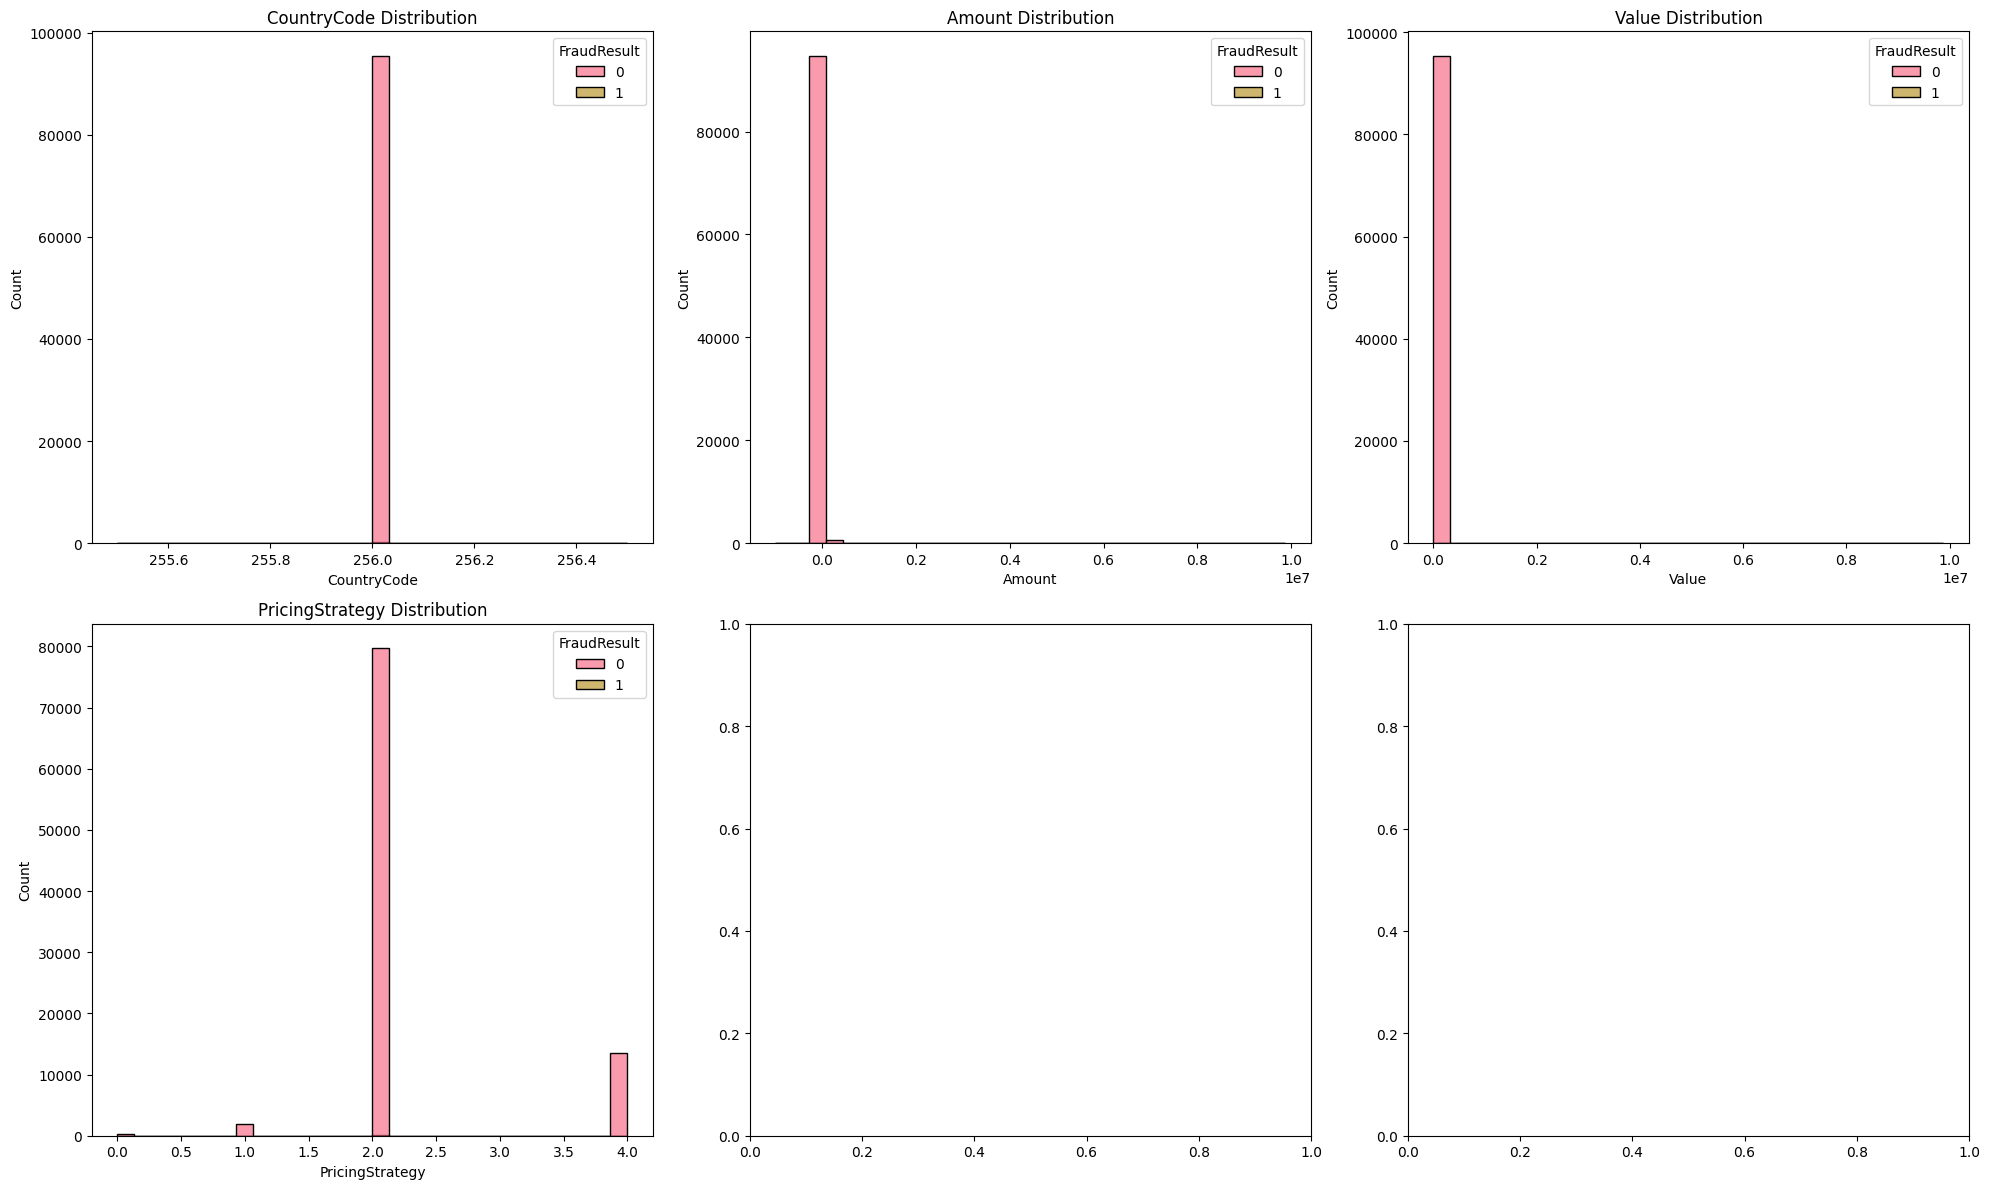

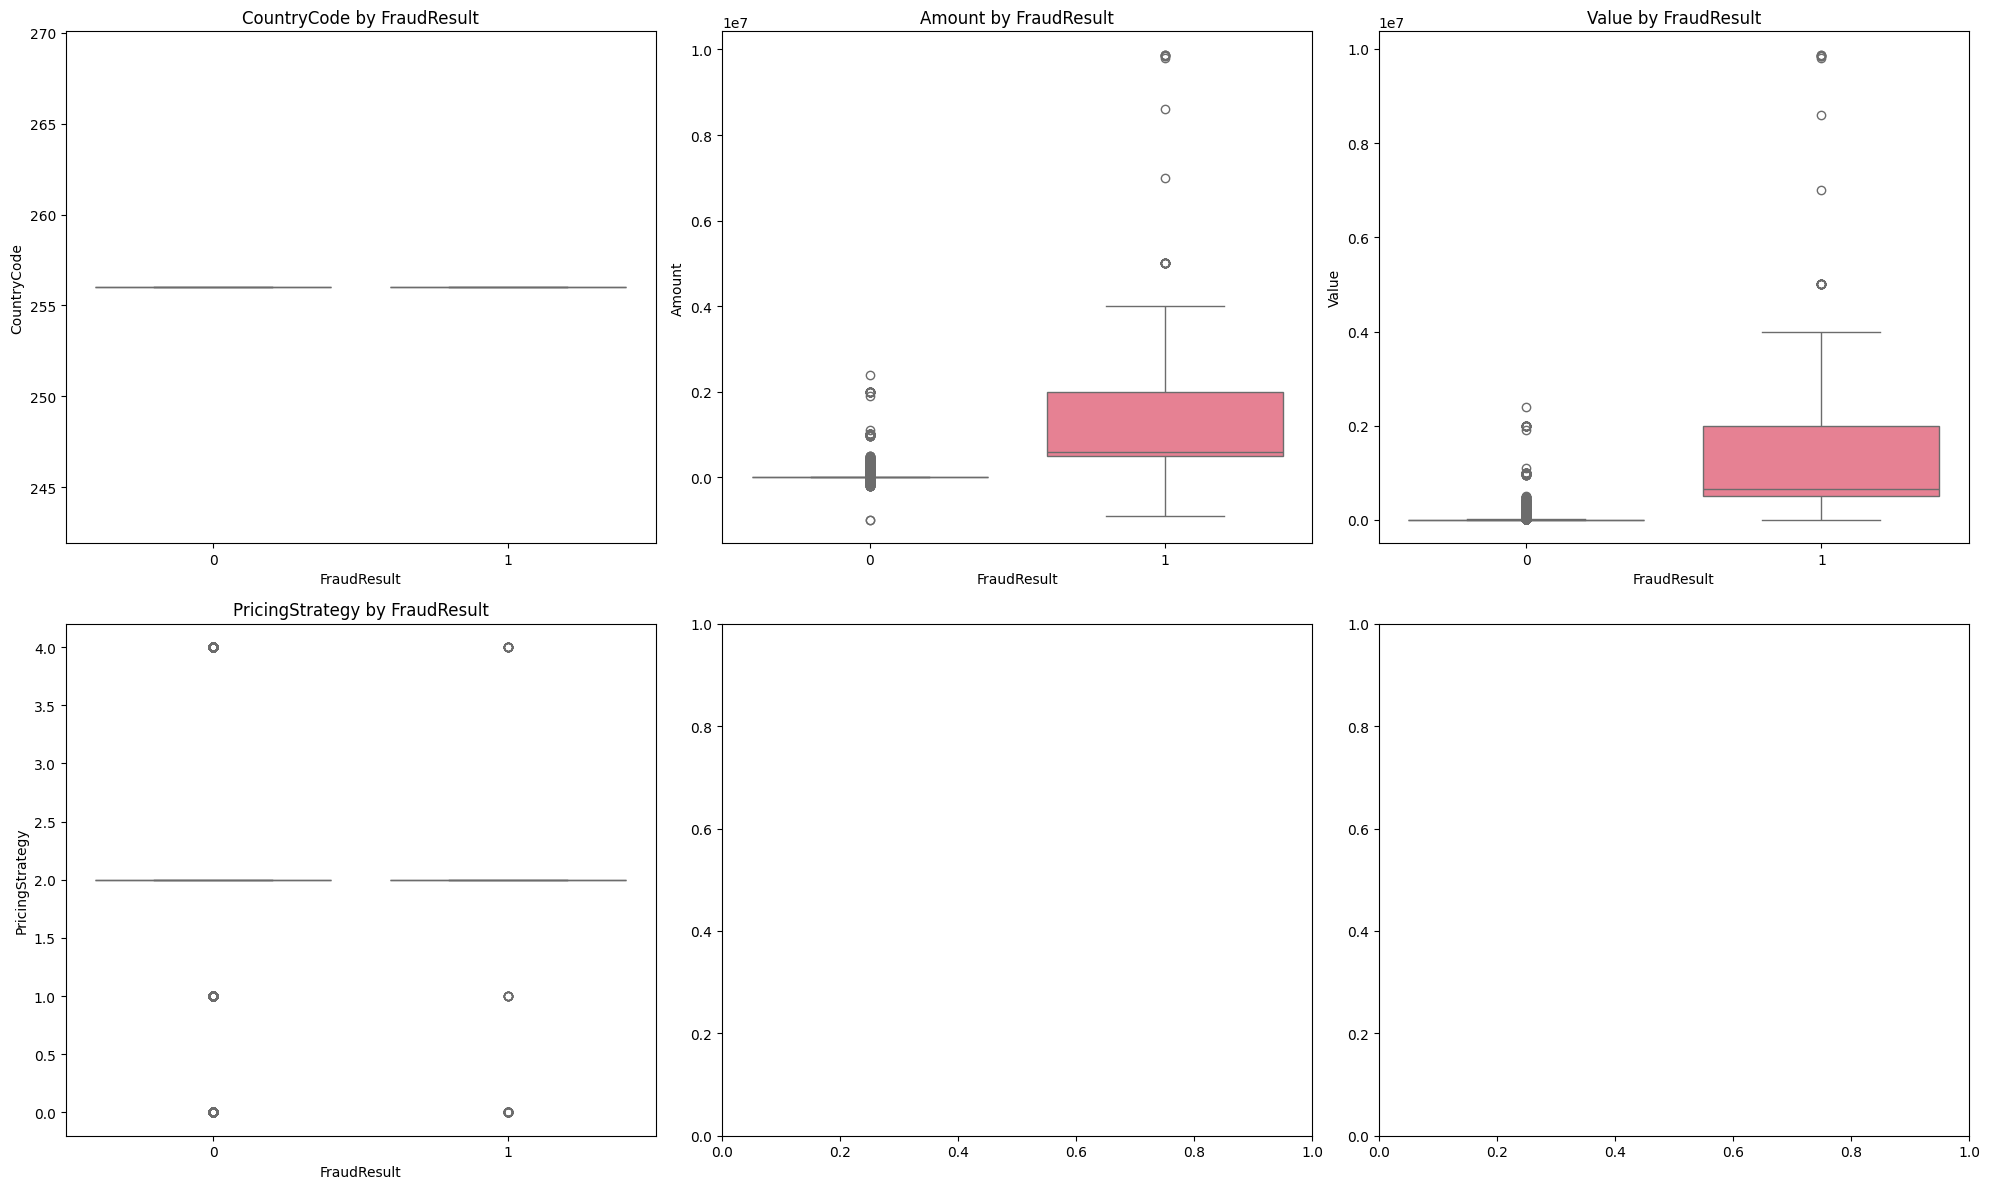

In [8]:
numerical_cols = eda.analyze_numerical_features(show_plots=True)

## Categorical Features Analysis
* The next cell examines the categorical features in the dataset using the `analyze_categorical_features` method of the `CreditRiskEDA` instance (`eda`).
* This method identifies categorical columns, computes value counts, and generates visualizations (such as bar plots) for each categorical feature.
* The output (`categorical_cols`) lists the identified categorical columns, which are important for further analysis and feature engineering.



=== CATEGORICAL FEATURES ANALYSIS ===
Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

TransactionId:
Unique values: 95662
Most common values:
TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64
Fraud rate by TransactionId (top 5):
TransactionId
TransactionId_121363    1.0
TransactionId_24542     1.0
TransactionId_22634     1.0
TransactionId_34940     1.0
TransactionId_25959     1.0
Name: FraudResult, dtype: float64

BatchId:
Unique values: 94809
Most common values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64
Fraud rate by BatchId (top 5):
BatchId
BatchId_32834     1.0
BatchId_116595    1.0
BatchId_10711     1.0
BatchId_107482    1.0
Bat

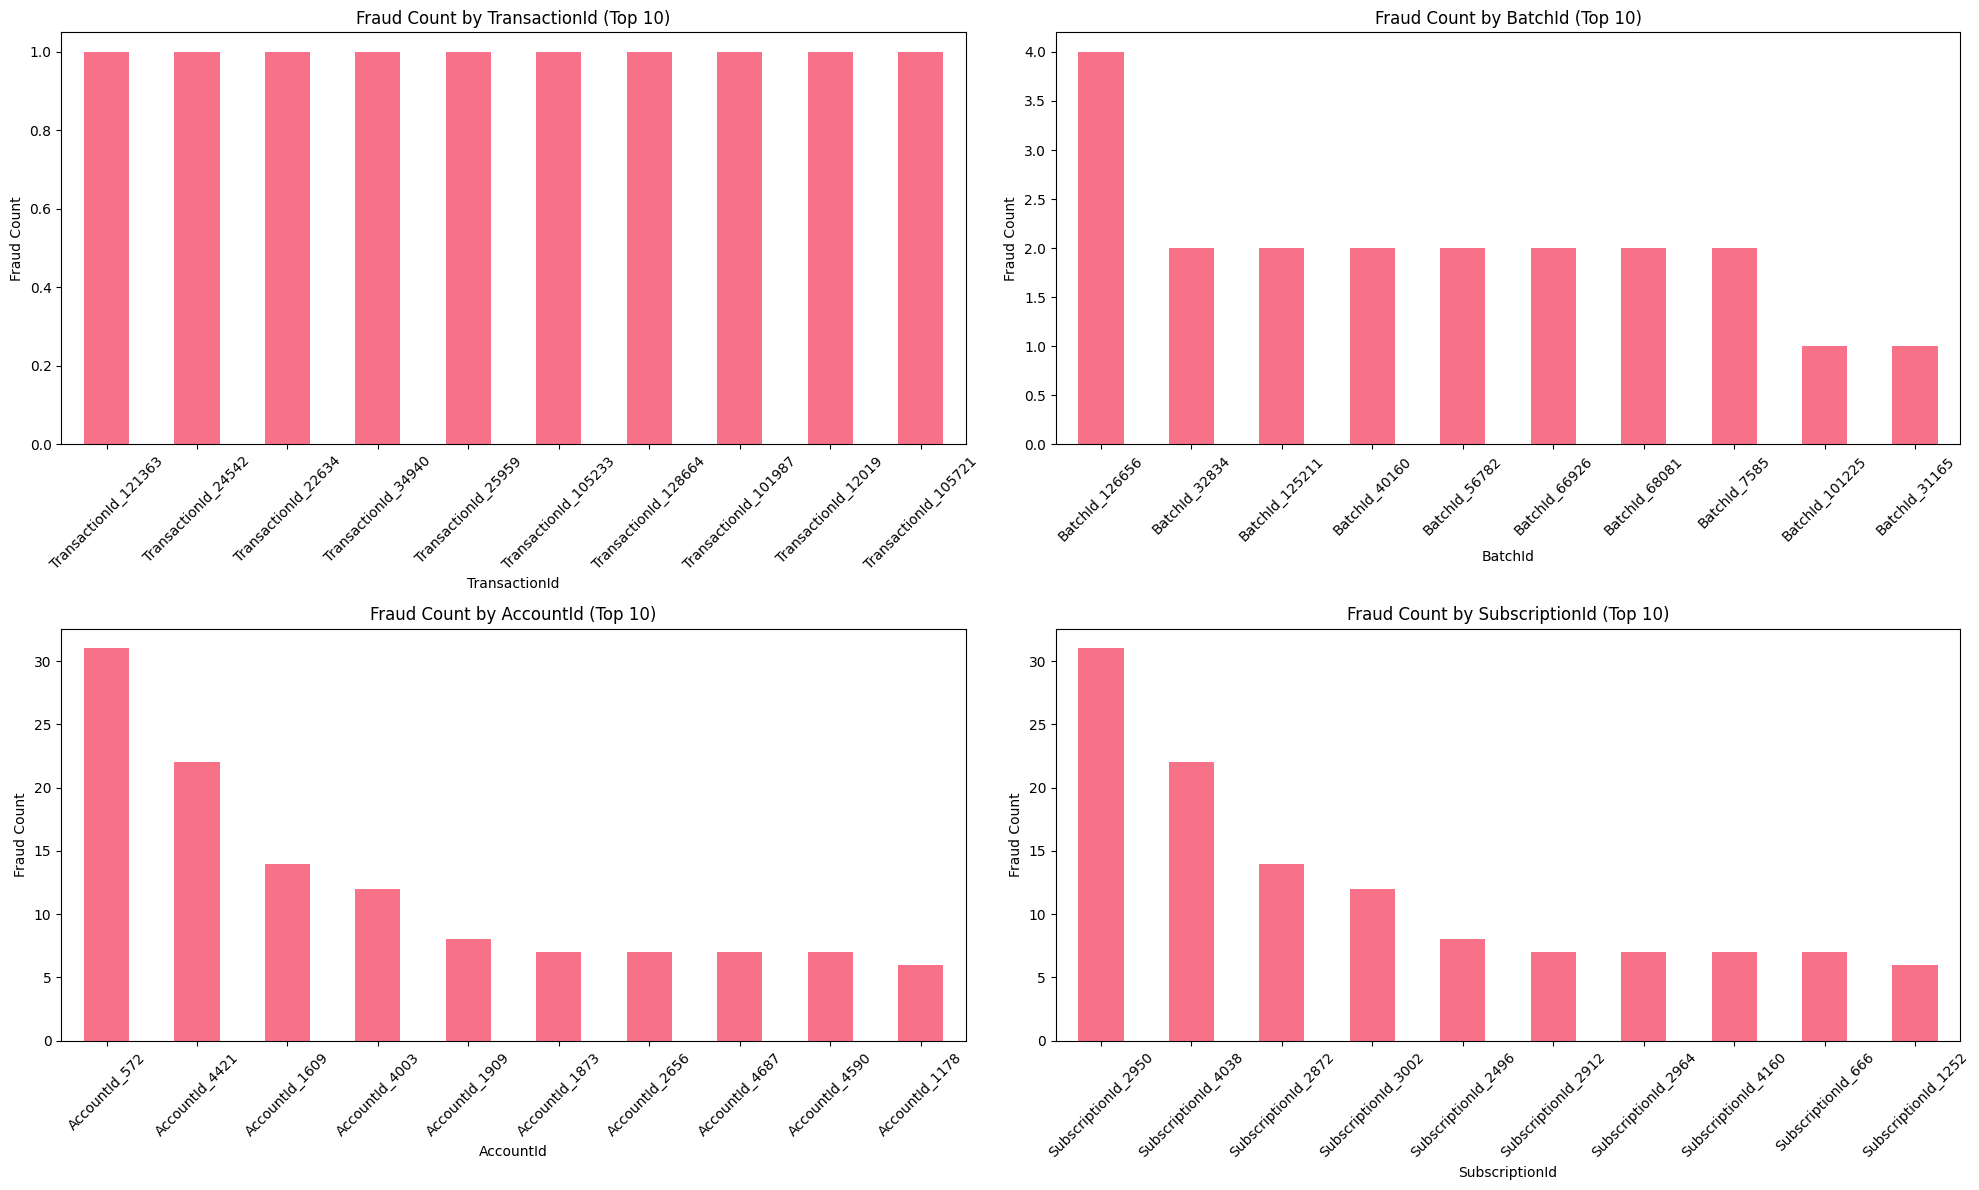

In [9]:
categorical_cols = eda.analyze_categorical_features(show_plots=True)

## Correlation Analysis
* The next cell performs a correlation analysis using the `correlation_analysis` method of the `CreditRiskEDA` instance (`eda`).
* This operation computes the correlation matrix for the numerical features in the dataset, helping to identify relationships between variables.
* If `show_plots=True`, the method also generates a heatmap visualization of the correlation matrix, making it easier to spot strong positive or negative correlations.
* The output (`correlations`) contains the computed correlation values, which are useful for feature selection and understanding multicollinearity in the data.



=== CORRELATION ANALYSIS ===


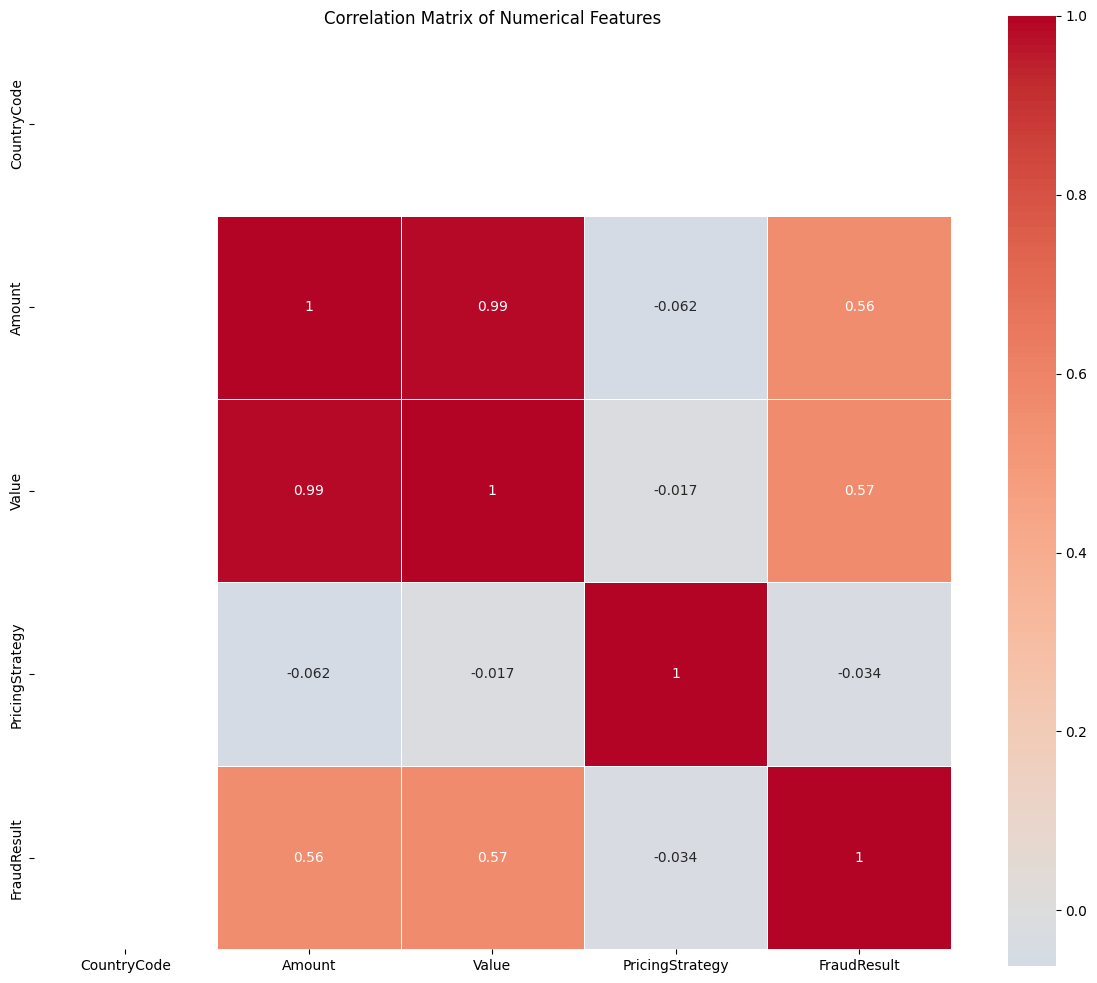

Correlations with target variable:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: FraudResult, dtype: float64


In [10]:
correlations = eda.correlation_analysis(show_plots=True)

## Time Series Analysis
* The next cell performs a time series analysis using the `time_series_analysis` method of the `CreditRiskEDA` instance (`eda`).
* This method analyzes temporal patterns in the dataset based on the `TransactionStartTime` column, such as trends or seasonality in transaction activity or fraud rates.
* If `show_plots=True`, the method generates visualizations (e.g., line plots, bar charts) to illustrate how key metrics (like fraud rate) vary over time (by hour, day of week, or month).
* The output consists of these plots and any computed statistics, helping to uncover time-based patterns that may be relevant for modeling or business insights.



=== TIME SERIES ANALYSIS ===


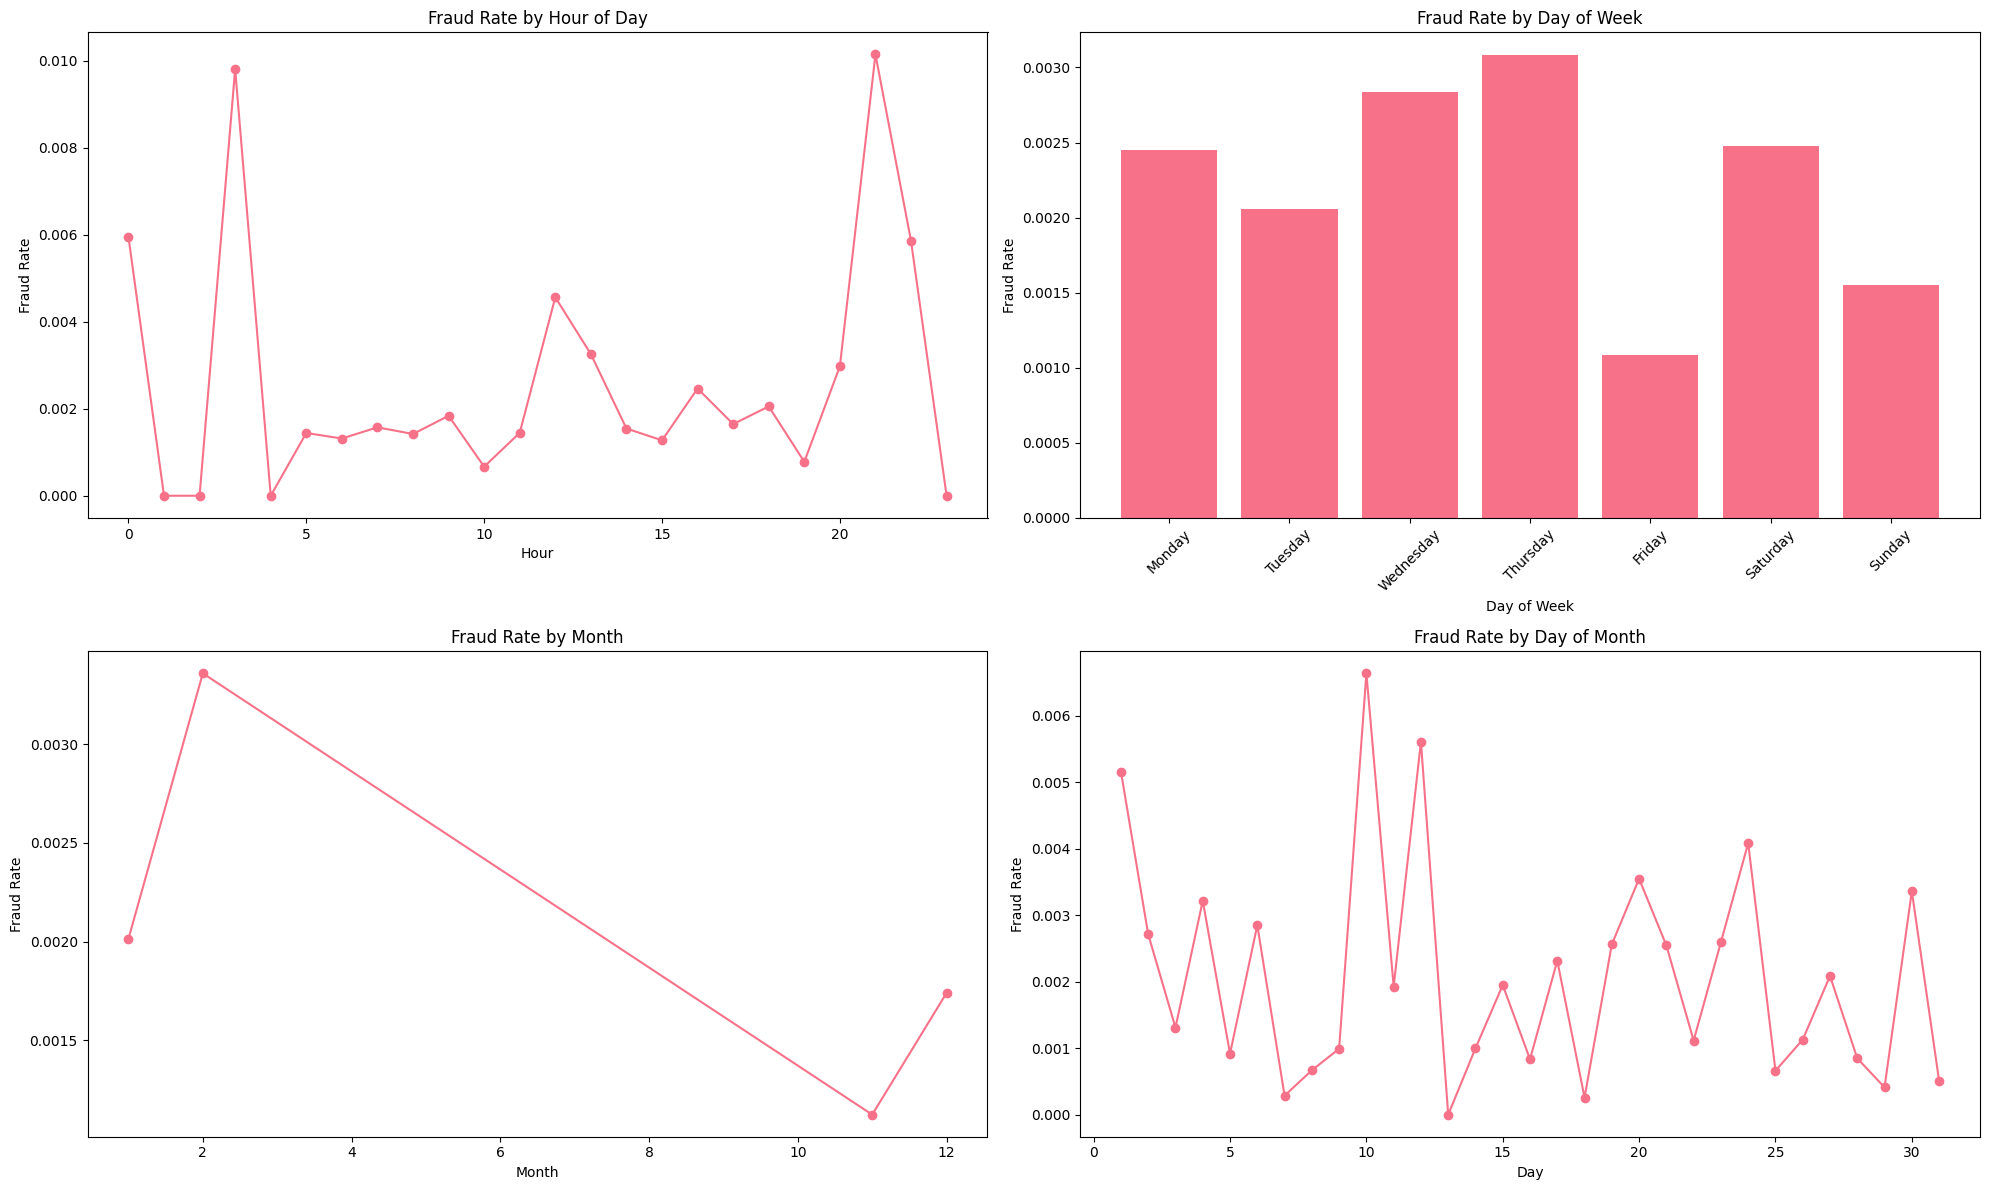

(hour
 0     0.005952
 1     0.000000
 2     0.000000
 3     0.009804
 4     0.000000
 5     0.001442
 6     0.001315
 7     0.001573
 8     0.001419
 9     0.001837
 10    0.000668
 11    0.001446
 12    0.004561
 13    0.003254
 14    0.001545
 15    0.001273
 16    0.002464
 17    0.001646
 18    0.002053
 19    0.000779
 20    0.002974
 21    0.010142
 22    0.005857
 23    0.000000
 Name: FraudResult, dtype: float64,
 day_of_week
 0    0.002450
 1    0.002060
 2    0.002834
 3    0.003080
 4    0.001082
 5    0.002475
 6    0.001549
 Name: FraudResult, dtype: float64,
 month
 1     0.002014
 2     0.003360
 11    0.001123
 12    0.001740
 Name: FraudResult, dtype: float64)

In [11]:
eda.time_series_analysis(time_col='TransactionStartTime', show_plots=True)

## Outlier Analysis
* The following cell performs outlier analysis using the `outlier_analysis` method of the `CreditRiskEDA` instance (`eda`).
* This method examines the numerical features in the dataset to detect and visualize potential outliers, which can impact model performance and data quality.
* If `show_plots=True`, the method generates visualizations (such as boxplots) to help identify extreme values in the data.
* The output (`outlier_stats`) contains statistics or information about detected outliers, which can be used for further data cleaning or feature engineering.



=== OUTLIER ANALYSIS ===
CountryCode: 0 outliers (0.00%)
  Range: [256.00, 256.00]
Amount: 24441 outliers (25.55%)
  Range: [-4325.00, 7075.00]
Value: 9021 outliers (9.43%)
  Range: [-6812.50, 12087.50]
PricingStrategy: 15814 outliers (16.53%)
  Range: [2.00, 2.00]


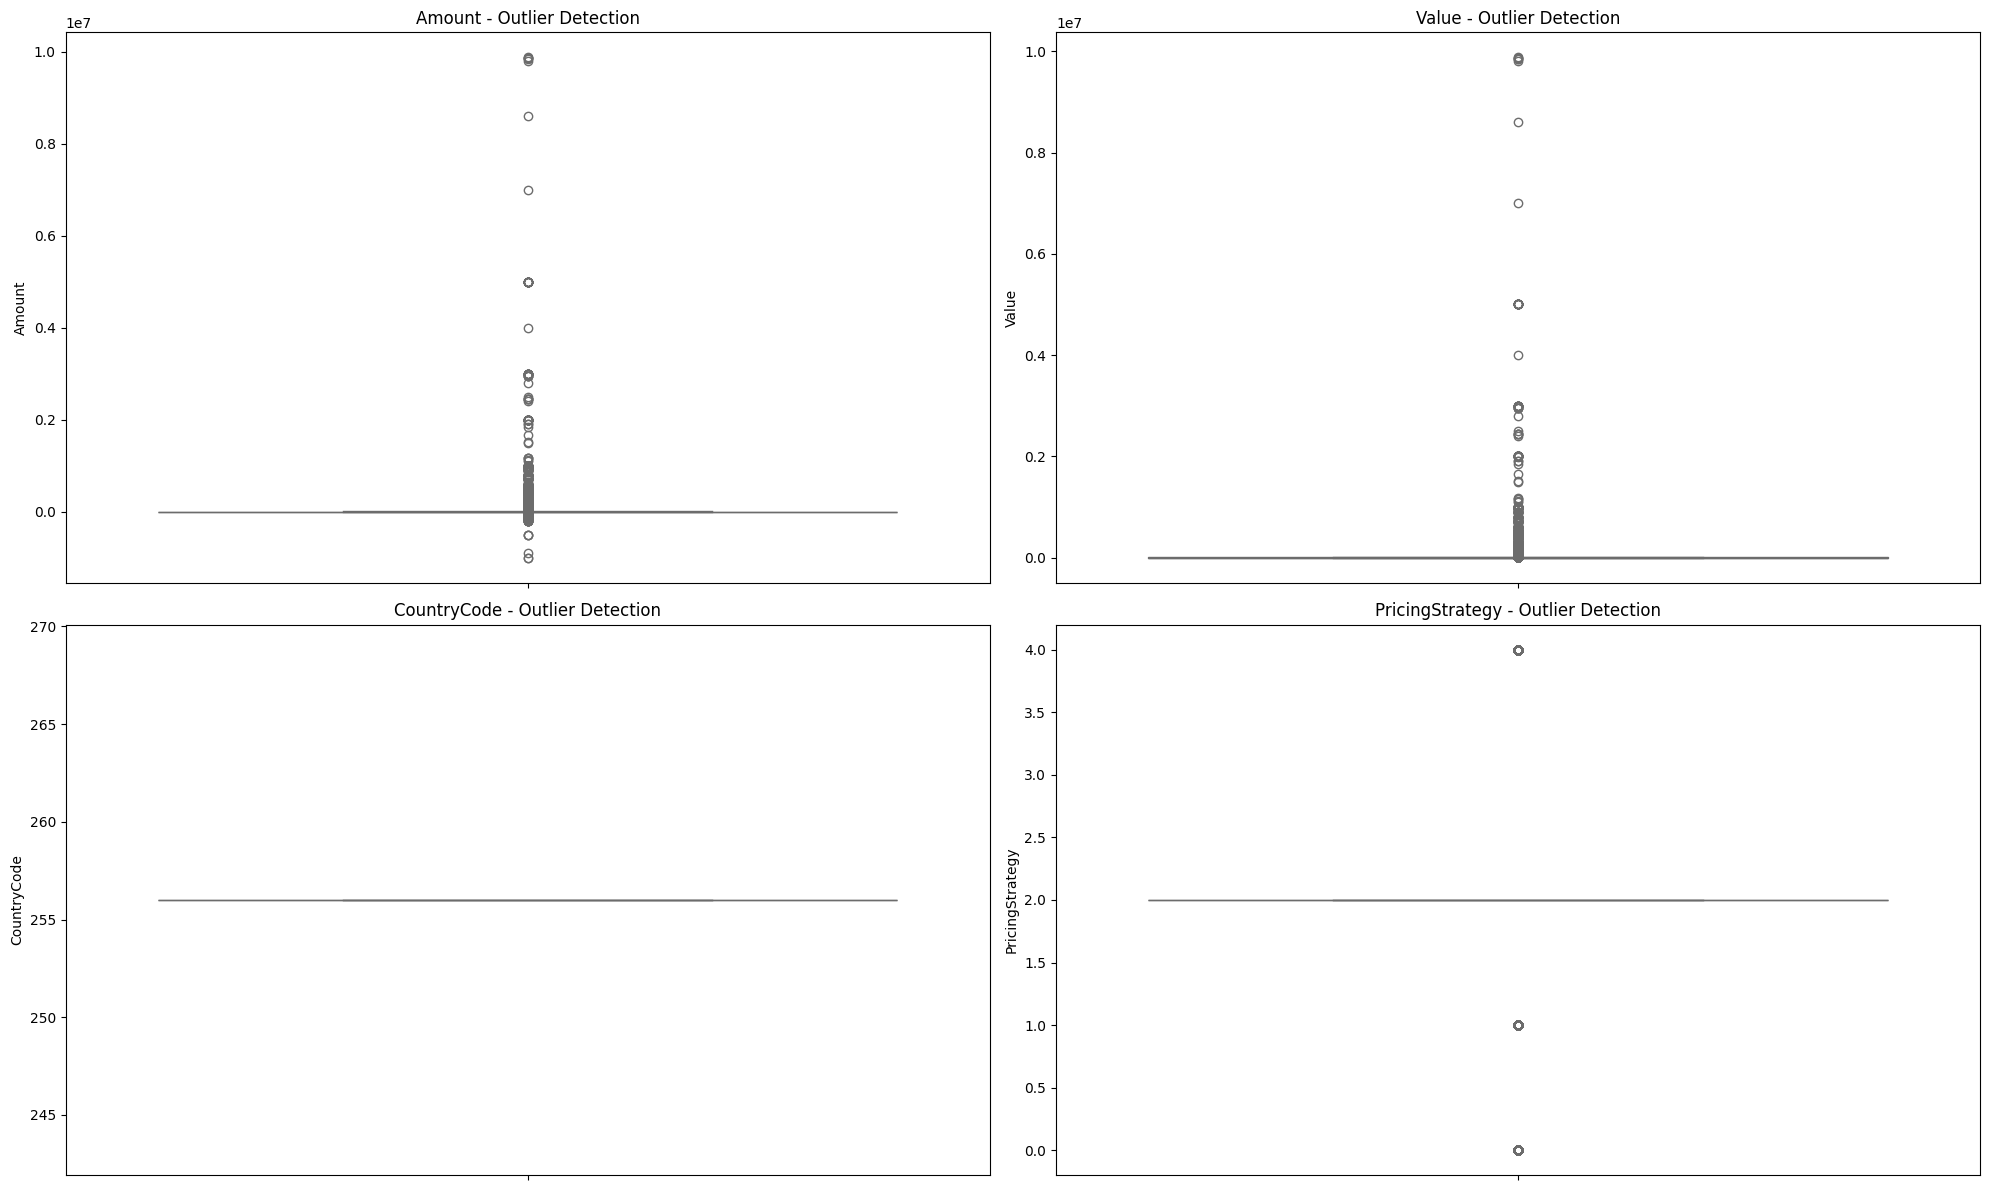

In [12]:
outlier_stats = eda.outlier_analysis(show_plots=True)

## Feature Engineering Insights
* The next cell calls the `feature_engineering_insights` method of the `CreditRiskEDA` instance (`eda`).
* This method explores and visualizes potential new features that could improve model performance, such as derived variables or transformations of existing columns.
* If `show_plots=True`, the method generates relevant plots to illustrate the impact or distribution of these engineered features.
* The output (`feature_eng`) contains insights or statistics about the engineered features, which can guide further feature selection or model development.



=== FEATURE ENGINEERING INSIGHTS ===
Fraud rate by transaction size:
transaction_size_category
Very Small    0.000000
Small         0.000109
Medium        0.000000
Large         0.000043
Very Large    0.009301
Name: FraudResult, dtype: float64

Fraud rate by transaction type:
is_credit
0    0.003271
1    0.000131
Name: FraudResult, dtype: float64


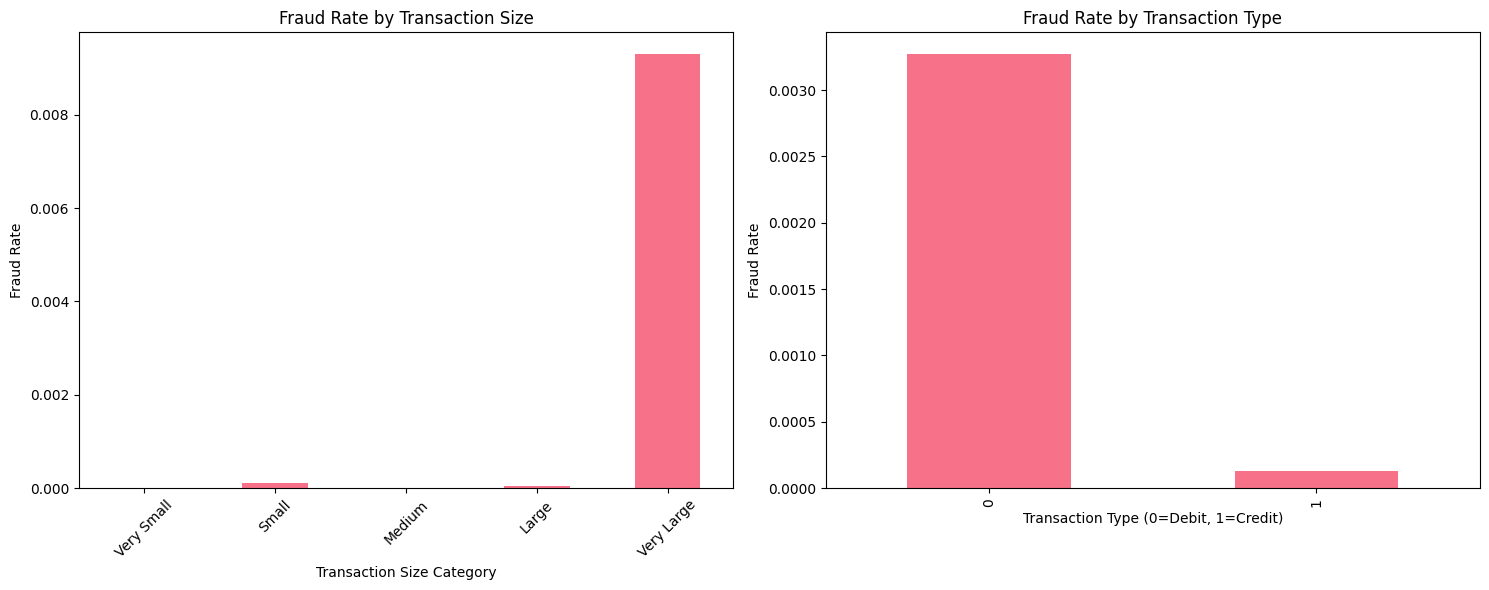

In [13]:
feature_eng = eda.feature_engineering_insights(show_plots=True)

## Datetime Formatting and Display
* The next cell imports the `format_datetime_column` and `date_formatter` functions from the `data_processing` module.
* It checks if the DataFrame `df` exists and contains the `TransactionStartTime` column.
* If so, it applies the `date_formatter` function to standardize or parse the `TransactionStartTime` column, ensuring consistent datetime formatting.
* The cell then displays the first few rows of the formatted `TransactionStartTime` column using the `head()` method.
* This operation helps verify that the datetime values are correctly formatted and ready for further time-based analysis or feature engineering.


In [15]:
from data_processing import format_datetime_column
if df is not None and 'TransactionStartTime' in df.columns:
    from data_processing import date_formatter
    df['TransactionStartTime'] = date_formatter(df['TransactionStartTime'])
    display(df[['TransactionStartTime']].head())

,TransactionStartTime
0,2018-11-15 02:18:49+00:00
1,2018-11-15 02:19:08+00:00
2,2018-11-15 02:44:21+00:00
3,2018-11-15 03:32:55+00:00
4,2018-11-15 03:34:21+00:00


## Summary Insights Generation
* The next cell generates a summary of key insights from the exploratory data analysis using the `generate_summary_insights` method of the `CreditRiskEDA` instance (`eda`).
* It passes several arguments to this method, including target variable statistics (`target_stats['counts']`), correlation values (`correlations`), and aggregated fraud rates by hour and day of week.
* The method compiles these inputs to produce a concise summary of important findings, such as class distributions, relationships between features, and temporal fraud patterns.
* The output (`summary`) provides a structured overview of the dataset's main characteristics and trends, which can inform further analysis or modeling decisions.


In [16]:
# You may need to pass the required arguments, e.g.:
summary = eda.generate_summary_insights(
    target_stats['counts'],
    correlations,
    eda.df.groupby(eda.df['TransactionStartTime'].dt.hour)['FraudResult'].mean(),
    eda.df.groupby(eda.df['TransactionStartTime'].dt.dayofweek)['FraudResult'].mean()
)


=== KEY INSIGHTS SUMMARY ===

Missing values:
✅ No missing values found
1. DATASET OVERVIEW:
   - Total transactions: 95,662
   - Fraud rate: 0.20%

2. DATA QUALITY:
   - No missing data found

3. KEY FEATURES FOR MODELING:
   - High correlation with target:
     * Value: 0.567
     * Amount: 0.557
     * PricingStrategy: -0.034
     * CountryCode: nan

4. TIME PATTERNS:
   - Peak fraud hour: 21 (1.01%)
   - Peak fraud day: Thursday (0.31%)

5. RECOMMENDATIONS FOR MODEL DEVELOPMENT:
   - Handle class imbalance using techniques like SMOTE or class weights
   - Feature engineering: create time-based features, transaction categories
   - Consider ensemble methods for better performance
   - Implement cross-validation with stratification
   - Monitor model performance on different time periods


### The next cell displays the first few rows of the loaded raw DataFrame using the `head()` method.


In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### The next cell displays the last few rows of the loaded row DataFrame using the `tail()` method.


In [4]:
df.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [ ]:
# Initialize and run comprehensive EDA
eda = CreditRiskEDA(data_path='../data/raw/data.csv', target_col='FraudResult')
results = eda.run_comprehensive_eda(use_preprocessing=True, show_plots=True)

#### The next cell preprocesses the loaded DataFrame using the `preprocess_dataframe` function from the `data_processing` module  

In [11]:
from data_processing import format_datetime_column
df_cleaned = data_processing.preprocess_dataframe(df)


#### The next cell displays the first few rows of the cleaned DataFrame using the `head()` method.

In [13]:
df_cleaned.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,transactionid_76871,batchid_36123,accountid_3957,subscriptionid_887,customerid_4406,ugx,256,providerid_6,productid_10,airtime,channelid_3,1000.0,1000,2018-11-15 02:18:49,2,0
1,transactionid_73770,batchid_15642,accountid_4841,subscriptionid_3829,customerid_4406,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-20.0,20,2018-11-15 02:19:08,2,0
2,transactionid_26203,batchid_53941,accountid_4229,subscriptionid_222,customerid_4683,ugx,256,providerid_6,productid_1,airtime,channelid_3,500.0,500,2018-11-15 02:44:21,2,0
3,transactionid_380,batchid_102363,accountid_648,subscriptionid_2185,customerid_988,ugx,256,providerid_1,productid_21,utility_bill,channelid_3,20000.0,21800,2018-11-15 03:32:55,2,0
4,transactionid_28195,batchid_38780,accountid_4841,subscriptionid_3829,customerid_988,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-644.0,644,2018-11-15 03:34:21,2,0


#### The next cell displays the last few rows of the cleaned DataFrame using the `tail()` method.


In [14]:
df_cleaned.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,transactionid_89881,batchid_96668,accountid_4841,subscriptionid_3829,customerid_3078,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-1000.0,1000,2019-02-13 09:54:09,2,0
95658,transactionid_91597,batchid_3503,accountid_3439,subscriptionid_2643,customerid_3874,ugx,256,providerid_6,productid_10,airtime,channelid_3,1000.0,1000,2019-02-13 09:54:25,2,0
95659,transactionid_82501,batchid_118602,accountid_4841,subscriptionid_3829,customerid_3874,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-20.0,20,2019-02-13 09:54:35,2,0
95660,transactionid_136354,batchid_70924,accountid_1346,subscriptionid_652,customerid_1709,ugx,256,providerid_6,productid_19,tv,channelid_3,3000.0,3000,2019-02-13 10:01:10,2,0
95661,transactionid_35670,batchid_29317,accountid_4841,subscriptionid_3829,customerid_1709,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-60.0,60,2019-02-13 10:01:28,2,0


## Preprocess DataFrame
Clean and normalize all text columns. Optionally, specify which columns to process.

In [15]:
if df is not None:
    df = data_processing.preprocess_dataframe(df)
    display(df.head())

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,transactionid_76871,batchid_36123,accountid_3957,subscriptionid_887,customerid_4406,ugx,256,providerid_6,productid_10,airtime,channelid_3,1000.0,1000,2018-11-15 02:18:49,2,0
1,transactionid_73770,batchid_15642,accountid_4841,subscriptionid_3829,customerid_4406,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-20.0,20,2018-11-15 02:19:08,2,0
2,transactionid_26203,batchid_53941,accountid_4229,subscriptionid_222,customerid_4683,ugx,256,providerid_6,productid_1,airtime,channelid_3,500.0,500,2018-11-15 02:44:21,2,0
3,transactionid_380,batchid_102363,accountid_648,subscriptionid_2185,customerid_988,ugx,256,providerid_1,productid_21,utility_bill,channelid_3,20000.0,21800,2018-11-15 03:32:55,2,0
4,transactionid_28195,batchid_38780,accountid_4841,subscriptionid_3829,customerid_988,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-644.0,644,2018-11-15 03:34:21,2,0


## Save Processed Data
Save the cleaned DataFrame to the processed directory.

In [17]:
if df is not None:
    data_processing.save_processed_data(df, filename='processed.csv', processed_dir='../data/processed/')
    print('Processed data saved!')

Processed data saved!


## Run Unit Tests
* The following cell runs the unit tests for the data processing module to ensure all functions work as expected.


In [10]:
!pytest ../tests/test_data_processing.py

============================= test session starts =============================
platform win32 -- Python 3.13.2, pytest-8.0.2, pluggy-1.6.0
rootdir: d:\10Acadamy\Credit-Risk-Probability-Model
plugins: anyio-4.9.0, hydra-core-1.3.2, cov-6.1.1
collected 6 items

..\tests\test_data_processing.py ......                                  [100%]

============================== 6 passed in 0.96s ==============================
